In [1]:
#Workshop1 Convolution2D 

import cv2
import numpy as np
import os

image = np.array([[1,0,2,1,0],  #ข้อมูลภาพ pixel 
                  [0,2,3,0,1],
                  [1,0,1,1,2],
                  [0,2,2,0,3],
                  [0,4,1,2,0]])

image = image/5.0  #ทำ Normalize ให้ได้ค่าสีใน pixel ให้อยู่ในช่วง 0-1

In [2]:
#Create Kernel 
kernel1 =np.array([[-1,0,1],
                  [-1,0,1],
                  [-1,0,1]])
im2 = cv2.filter2D(src=image,ddepth=-1,kernel=kernel1) #conv2 

In [3]:
im2_int = (im2*5).astype('int') #แปลงข่้อมุลให้เป็น int 
im2_int

array([[ 0,  7, -3, -6,  0],
       [ 0,  4,  0, -3,  0],
       [ 0,  5, -3,  0,  0],
       [ 0,  3, -3,  0,  0],
       [ 0,  5, -6,  0,  0]])

In [4]:
#Workshop2  Feature Map 

image= cv2.imread('picture/building.jpg')

if image is None: 
    print('Could not read image')
    
#kernel1 = np.array([[-1,0,1],  #kernel สำหรับ detect แนวดิ่ง
 #                  [-3,0,3],
 #                  [-1,0,1]])

kernel1 = np.array([[-1, -1, -1], # 
                     [-1, 8, -1],
                     [-1, -1, -1]])

fea_map = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
cv2.imshow('Orginal',image)  #origianl
cv2.imshow('Feature',fea_map) # show result
cv2.imwrite('feature_map1.jpg',fea_map)  #save result 
cv2.waitKey() #show image
cv2.destroyAllWindows()#ปิดหน้าต่าง

In [6]:
#Another kernel 


# kernel1 = np.array([[-1,-3, -1], # 
#                     [0,  0,  0],
#                     [1,  3,  1]])


# kernel1 = np.array([[0,  1,  3], # 
#                     [-1,  0, 1],
#                     [-3,-1,  0]])

# kernel1 = np.array([[-3, -1, 0], # 
#                     [-1,  0, 1],
#                     [0,  1, 3]])

# kernel1 = np.array([[-1, -1, -1], # 
#                     [-1, 8, -1],
#                     [-1, -1, -1]])

In [5]:
#Workshop 3 Pooling 
#ลด scale ของภาพ
import numpy as np 
from  tensorflow.keras  import Sequential
from tensorflow.keras.layers import MaxPool2D,AveragePooling2D

image = np.array([[2,3,4,2],  #pixel of picture
                 [8,5,5,1],
                 [6,7,9,4],
                 [3,1,4,5]])

#reshape เปลี่ยนข้อมูล 1 แถวที่มีขนาด 4*4 และ 1 ch 
arr =image.reshape(1,4,4,1)


In [7]:
# สร้าง Sequential model ที่เฉพาะ Pooling layer 
model = Sequential()
model.add(MaxPool2D(pool_size=(2,2)))

#ประมวลผล

output =model.predict(arr) #มิติ 1,2,2,1

output=np.squeeze(output)  #reshape ตัดแกนออกไป กลายเป็น 2,2
print(output)

1/1 [==============================] - 0s 81ms/step
[[8 5]
 [7 9]]


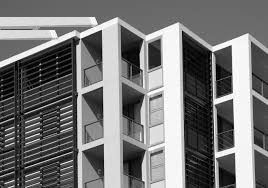

In [8]:
# Workshop 4 pooling next to Convolution

import numpy as np 
from PIL import Image,ImageOps

imgfile = 'picture/building.jpg'
image = Image.open(imgfile).convert('L') #read file 
image #show image  

In [9]:
pixel =np.array(image)   #pixel W x H
pixel.shape

(188, 268)

In [ ]:
#again   
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D 

arr = pixel.reshape(1, 188, 268, 1)  
#สร้าง Sequential model ที่มีเฉพาะ Pooling layer  
model = Sequential() 
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(MaxPool2D(pool_size=(3, 3)))
   
output = model.predict(arr) 
 
output = np.squeeze(output) 
Image.fromarray(output)

In [10]:
#Workshop5 create model and see kerel

from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D , Flatten 
import matplotlib.pyplot as plt
import numpy as np 

in_shape = (100,100,3) #input shape 100x100x3

model = Sequential()  #create model
model.add(Conv2D(32,(3,3),activation='relu',input_shape=in_shape))    #ชั้นแรก  
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))  #ชั้นสอง
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))  #ชั้นสาม
model.add(MaxPool2D(2,2))

model.add(Flatten()) #ยังไม่ได้ใช้ใน Workshop นี้ 
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 128)     

In [11]:
#kernel 
for layer  in  model.layers:   #list of name
    if 'conv' not in layer.name:#read only convolutional layer 
        continue
    kernels,biases = layer.get_weights()  #Read kernetl weight
    print(layer.name,'shape',kernels.shape) #show name of shape

conv2d shape (3, 3, 3, 32)
conv2d_1 shape (3, 3, 32, 64)
conv2d_2 shape (3, 3, 64, 128)


In [12]:
model_idx = 0 #ลำดับ index ของ kernel
kernels,biases = model.layers[model_idx].get_weights() #read 
kernels.shape

(3, 3, 3, 32)

In [13]:
#kernel procesing by Normalize 

k_min,k_max= kernels.min(),kernels.max()
kernels = (kernels-k_min)/(k_max-k_min)
kernels_idx =0
kernels_i =kernels[:,:,0,kernels_idx]
print(kernels_i.round(2))

[[0.12 0.37 0.69]
 [0.97 0.08 0.11]
 [0.34 0.65 0.58]]


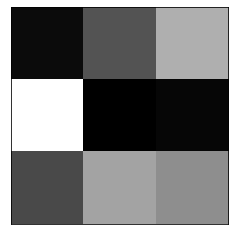

In [15]:
#plot
plt.imshow(kernels_i, cmap=plt.cm.gray) 
plt.xticks([])
plt.yticks([])
plt.show()


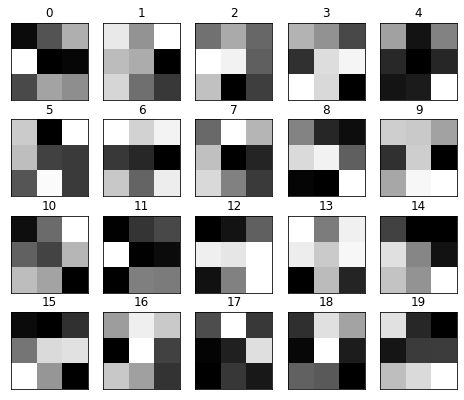

In [17]:
#multi Plot

nplot = 20  #จำนวน kernel ที่พล็อต 
fig = plt.figure(figsize=(8,6.8)) #Plot size
for j in range(nplot):
    plt.subplot(4,5,j+1)
    plt.imshow(kernels[:,:,0,j],cmap=plt.cm.gray)
    plt.title(j)
    plt.xticks([]),plt.yticks([])
plt.show()
    

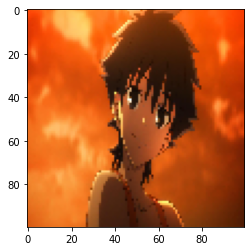

In [35]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot

#โหลดภาพแล้วปรับขนาด 100x100
#เปลี่ยนเอง 500 x 500
image=load_img('kiristugu.jpg',target_size=(100,100))
plt.imshow(image)
plt.show()

In [36]:
img = img_to_array(image)
print('shape=',img.shape)
print('max pixel value=',np.max(img))

shape= (100, 100, 3)
max pixel value= 255.0


In [37]:
img = np.expand_dims(img,axis = 0)
img.shape

(1, 100, 100, 3)

In [33]:
#Convo2D ชั้นแรก
from tensorflow.keras.models import Model

layer_idx = 0 #first layer 
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)

feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 48ms/step


(1, 98, 98, 32)

In [38]:
f_min,f_max  =feature_maps.min(),feature_maps.max()
feature_maps = (feature_maps-f_min)/(f_max - f_min)
feature_maps.min(),feature_maps.max()

(0.0, 1.0)

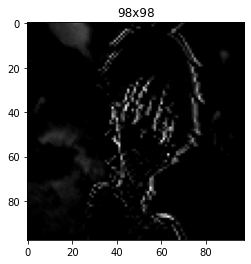

In [40]:

sample_idx = 0
fea_idx = 10
feature_map_i = feature_maps[sample_idx, :, :, fea_idx]

plt.title('{}x{}'.format(feature_map_i.shape[0],feature_map_i.shape[0]))
plt.imshow(feature_map_i, cmap=plt.cm.gray)
plt.show()

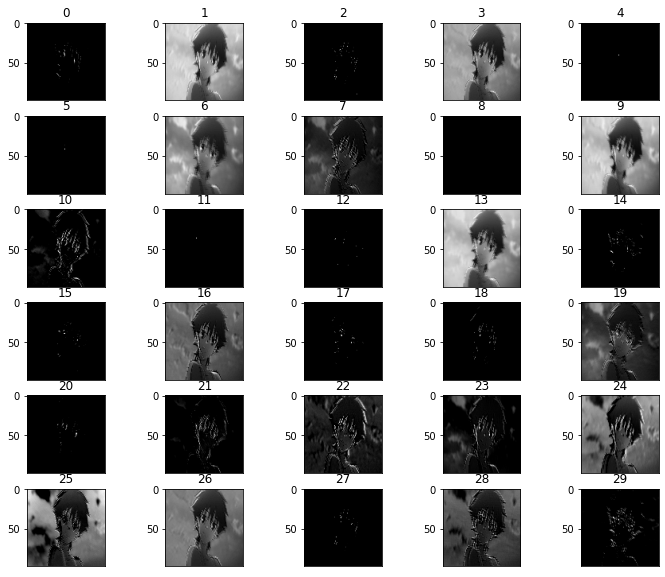

In [41]:
nplots = 30   #จำนวน kernel ที่พล็อต 
fig = plt.figure(figsize=(12, 10))  # size 
for j in range(nplots):
    plt.subplot(6, 5, j+1)  # row , column
    plt.imshow(feature_maps[sample_idx, :, :, j], cmap=plt.cm.gray)
    plt.title(j)
    plt.xticks([]) # ; plt.yticks([])

plt.show()

In [42]:
#Layer MaxPooling 1 

from tensorflow.keras.models import Model

layer_idx = 1
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)

feature_maps = md.predict(img)
feature_maps.shape


1/1 [==============================] - 0s 23ms/step


(1, 49, 49, 32)

In [43]:
#Convo2D ชั้นสอง
layer_idx = 2 #second layer 
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)

feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 27ms/step


(1, 47, 47, 64)

In [44]:
#Max pooling
layer_idx = 3
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)

feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 30ms/step


(1, 23, 23, 64)

In [45]:
#Convo2D ชั้นสาม
layer_idx = 4 #thrid layer 
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)

feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 32ms/step


(1, 21, 21, 128)

In [46]:
#Max pooling
layer_idx = 5
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)

feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 34ms/step


(1, 10, 10, 128)

In [49]:
#Workshop7 ข้อมูลัวเลขลายมือ 
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data() #load data

11490434/11490434 [==============================] - 6s 1us/step


In [50]:
print(X_train.shape) #ตรวจสอบจำนวนข้อมูลสำหรับ  Feature trian
print(X_test.shape)#Test


(60000, 28, 28)
(10000, 28, 28)


In [51]:
print(y_train.shape) #label/target/class
print(y_test.shape)


(60000,)
(10000,)


In [60]:
X_train[0]
#X_train[0,:,7:20] #show some infor


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [55]:
y_train[0:10] #Target คือ Label กำกับภาพ บอกข้อมูลว่าแถวแต่ละแถวคือเลขไร

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [56]:
np.min(X_train),np.max(X_train)  #มี่ 0 - 255

(0, 255)

In [58]:
np.isnan(X_train).sum()

0

In [57]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


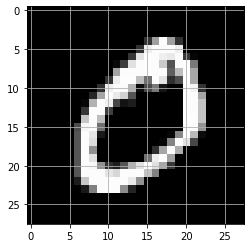

In [70]:
#Workshop 8 Visualization แสดงภาพของตัวเลข

import matplotlib.pyplot as plt 
#ต้องการแสดงรูปลำดับของตัวเลช

img = X_train[1]  #ลำดับ  0-59999
plt.imshow(img,cmap=plt.cm.gray) #พื้นสีดำ
plt.grid()
plt.show()

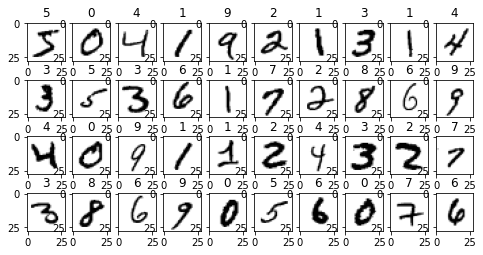

In [71]:
def visual_multi(i):
    nplots = 40 #จำนวนภาพ
    fig = plt.figure(figsize=(8, 4)) #กำหนด size  
    for j in range(nplots):
        plt.subplot(4, 10, j+1) # 4 row 10 columns
        plt.imshow(X_train[i+j], cmap=plt.cm.gray_r) #show pic
        plt.title(y_train[i+j]) #ถ้าไม่แสดงกรอบให้เอาออก
    plt.show()

    
#Example 
visual_multi(0)

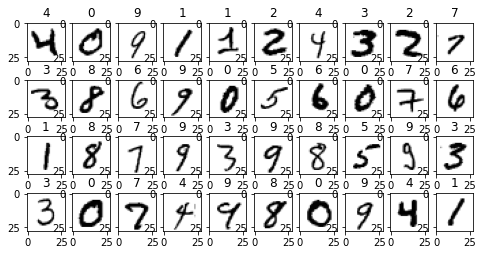

In [75]:
visual_multi(20)